In [1]:
# Importation des modules nécessaires
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150 #Simplement pour avoir une meilleure résolution

In [2]:
# Définition de la taille de matrice et du nombre d'itérations ainsi qu'un tableau vide
liste_vp = np.empty(0)
iterations = 1000
ordre = 100

### Itération de la génération de n matrices symétriques, le calcul de leurs valeurs propres et du rajout de celles-ci à la liste
for n in range(iterations):
    
    # Génération d'un tableau d'ordre 100 rempli de données aléatoires issues de l'ensemble [-1,1]
    M = np.random.uniform(-1, 1, size=(ordre,ordre))

    # Substitution de l'élément A_ij par l'élément A_ji t.q. A == A.T (matrice symétrique)
    M[np.tril_indices_from(M, k=-1)] = 0
    M=M+M.T-np.diag(np.diagonal(M))
    
    # Calcul des valeurs propres de la matrice A
    e, v = la.eigh(M)
    
    # Ajout des valeurs propres de A à la liste de valeurs propres
    liste_vp=np.concatenate((liste_vp,e),axis=None)

In [3]:
# Extraction de la partie réelle des valeurs propres (la composante imaginaire est toujours nulle)
data = np.real(liste_vp)

# Obtention des délimiteurs de chaque catégorie et de la fréquence des éléments constituant lesdites catégories
freq, sep = np.histogram(data, bins=20, range=(np.amin(data), np.amax(data)))

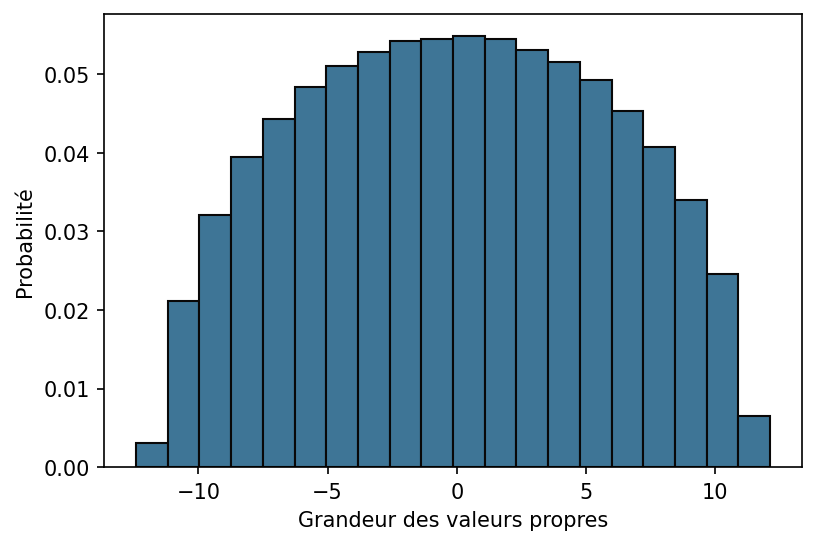

In [4]:
# Histogramme de la probabilité d'obtenir une valeur propre en fonction de la magnitude de la valeur propre
plt.figure()

#Tracer l'histogramme
(n, bins, p)=plt.hist(data, bins=sep, density=True, color='#3e7596', ec='#090808')
plt.xlabel('Grandeur des valeurs propres')
plt.ylabel('Probabilité')

#Afficher
plt.show()

On trouve notre valeur de R en observant la distribution à $x=0$, où la fonction de la distribution de Wigner atteint son maximum: $$p_{max}=\frac{2}{\pi R} \iff R = \frac{2}{\pi p_{max}}$$

<ipython-input-5-d3a02b4fbda0>:6: RuntimeWarning: invalid value encountered in sqrt
  return (2/(np.pi * R**2)) * np.sqrt(R**2 - x**2)


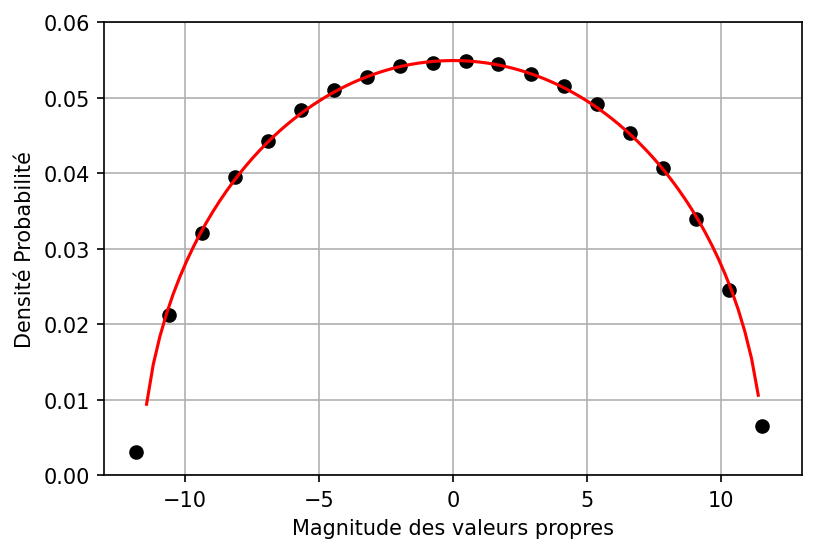

In [5]:
# Génération d'une liste contenant les valeurs moyennes trouvées entre les points de séparation utilisés dans l'histogramme
pt_mil = (sep[:-1]+sep[1:])/2

# La fonction (distribution de Wigner)
def F(x, R):
    return (2/(np.pi * R**2)) * np.sqrt(R**2 - x**2)

# Génération du graphique de comparaison entre les points expérimentaux et la distribution 
plt.figure()

#Trouver R
R=2/(max(n)*math.pi)

# L'abscisse pour la courbe de la distribution
x_curve = np.linspace(np.min(data), np.max(data), 100)

#Afficher les données et la fonction
plt.plot(pt_mil, n, 'o', color='black')
plt.plot(x_curve, F(x_curve, R), color='red')

#Option d'affichage
plt.ylim(0,0.06)
plt.xlim(-13,13)
plt.grid()
plt.xlabel("Magnitude des valeurs propres")
plt.ylabel("Densité Probabilité")

#On affiche le graphique
plt.show()